# Exploratory Data Analysis (Global Traffic Accidents Dataset)

## Loading the Data

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df = pd.read_csv(r'E:\Projects\EDA Projects\01\global_traffic_accidents.csv')
df.head()

,Accident ID,Date,Time,Location,Latitude,Longitude,Weather Condition,Road Condition,Vehicles Involved,Casualties,Cause
0,b0dd6f57,4/19/2023,6:39,"Mumbai, India",13.488432,-73.290682,Snow,Snowy,5.0,7.0,Reckless Driving
1,debfad09,1/17/2023,2:47,"São Paulo, Brazil",-37.798317,-32.244242,Clear,Icy,4.0,1.0,Drunk Driving
2,6d69aa36,4/9/2024,2:55,"Sydney, Australia",33.767869,104.869018,Rain,Snowy,1.0,7.0,Reckless Driving
3,425bb1f0,10/10/2023,11:23,"Tokyo, Japan",-0.378031,-165.825855,Storm,Wet,4.0,0.0,Drunk Driving
4,90d5cf62,1/2/2023,12:07,"Beijing, China",41.254879,-30.776959,Storm,Snowy,3.0,9.0,Reckless Driving


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10013 entries, 0 to 10012
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Accident ID        10013 non-null  object 
 1   Date               10000 non-null  object 
 2   Time               10006 non-null  object 
 3   Location           10008 non-null  object 
 4   Latitude           10013 non-null  float64
 5   Longitude          10013 non-null  float64
 6   Weather Condition  10013 non-null  object 
 7   Road Condition     10013 non-null  object 
 8   Vehicles Involved  9990 non-null   float64
 9   Casualties         10001 non-null  float64
 10  Cause              10013 non-null  object 
dtypes: float64(4), object(7)
memory usage: 860.6+ KB


In [105]:
df.duplicated().sum()

np.int64(13)

In [106]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

## Data Cleaning

In [107]:
print(f"Missing Values:\n{df.isnull().sum()}")

Missing Values:
Accident ID           0
Date                 13
Time                  7
Location              5
Latitude              0
Longitude             0
Weather Condition     0
Road Condition        0
Vehicles Involved    22
Casualties           11
Cause                 0
dtype: int64


In [108]:
df['Casualties'] = df['Casualties'].fillna(df['Casualties'].median())
df['Vehicles Involved'] = df['Vehicles Involved'].fillna(df['Vehicles Involved'].median())
df.dropna(subset=['Date', 'Time', 'Location'], inplace=True)

In [109]:
print(f"Missing Values:\n{df.isnull().sum()}")

Missing Values:
Accident ID          0
Date                 0
Time                 0
Location             0
Latitude             0
Longitude            0
Weather Condition    0
Road Condition       0
Vehicles Involved    0
Casualties           0
Cause                0
dtype: int64


In [110]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [142]:
nat_count = df['Date'].isna().sum()
print(f"Number of NaT values in 'Date' column after converting to datetime: {nat_count}")

Number of NaT values in 'Date' column after converting to datetime: 0


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9978 entries, 0 to 10012
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Accident ID        9978 non-null   object        
 1   Date               9978 non-null   datetime64[ns]
 2   Time               9978 non-null   object        
 3   Location           9978 non-null   object        
 4   Latitude           9978 non-null   float64       
 5   Longitude          9978 non-null   float64       
 6   Weather Condition  9978 non-null   object        
 7   Road Condition     9978 non-null   object        
 8   Vehicles Involved  9978 non-null   float64       
 9   Casualties         9978 non-null   float64       
 10  Cause              9978 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 935.4+ KB


In [112]:
print("\nCleaned Dataset Shape:", df.shape)


Cleaned Dataset Shape: (9978, 11)


## Summary Statistics

In [113]:
df.describe()

,Date,Latitude,Longitude,Vehicles Involved,Casualties
count,9978,9978.000000,9978.000000,9978.000000,9978.000000
mean,2024-01-01 13:25:17.498496768,-0.567211,0.393068,2.998597,4.988274
min,2023-01-01 00:00:00,-89.985688,-179.961984,1.000000,0.000000
25%,2023-06-30 00:00:00,-45.443242,-88.197004,2.000000,2.000000
50%,2024-01-01 00:00:00,-1.099855,-0.249092,3.000000,5.000000
75%,2024-07-03 00:00:00,44.131219,90.007728,4.000000,8.000000
max,2024-12-31 00:00:00,89.990081,179.981695,5.000000,10.000000
std,NaN,51.914733,103.377446,1.407820,3.127949


In [114]:
print(f"Unique Causes of Accidents: {df['Cause'].nunique()}")

Unique Causes of Accidents: 6


In [115]:
print("Unique Causes are as below:")
for i, uc in enumerate(df['Cause'].unique(), 1):
    print (f"{i}.{uc}")

Unique Causes are as below:
1.Reckless Driving
2.Drunk Driving
3.Weather Conditions
4.Mechanical Failure
5.Speeding
6.Distracted Driving


In [120]:
print(f"Top 3 Causes:\n{df['Cause'].value_counts().head(3)}")

Top 3 Causes:
Cause
Drunk Driving       1712
Reckless Driving    1681
Speeding            1653
Name: count, dtype: int64


In [133]:
print(f"Unique Road Conditions in Accidents: {df['Road Condition'].nunique()}")

Unique Road Conditions in Accidents: 6


In [128]:
print("Unique Road Conditions are as below:")
for i, rc in enumerate(df['Road Condition'].unique(), 1):
    print (f"{i}.{rc}")

Unique Road Conditions are as below:
1.Snowy
2.Icy
3.Wet
4.Under Construction
5.Gravel
6.Dry


In [135]:
print(f"Top 3 Road Conditions in Accidents:\n{df['Road Condition'].value_counts().head(3)}")

Top 3 Road Conditions in Accidents:
Road Condition
Dry       1725
Gravel    1698
Wet       1675
Name: count, dtype: int64


In [130]:
print(f"Unique Weather Conditions: {df['Weather Condition'].nunique()}")

Unique Weather Conditions: 6


In [131]:
print("Unique Weather Conditions are as below:")
for i, wc in enumerate(df['Weather Condition'].unique(), 1):
    print (f"{i}.{wc}")

Unique Weather Conditions are as below:
1.Snow
2.Clear
3.Rain
4.Storm
5.Fog
6.Hail


In [136]:
print(f"Top 3 Weather Conditions:\n{df['Road Condition'].value_counts().head(3)}")

Top 3 Weather Conditions:
Road Condition
Dry       1725
Gravel    1698
Wet       1675
Name: count, dtype: int64


In [137]:
print(f"Unique Locations: {df['Location'].nunique()}")

Unique Locations: 10


In [138]:
print("Unique Locations are as below:")
for i, l in enumerate(df['Location'].unique(), 1):
    print (f"{i}.{l}")

Unique Locations are as below:
1.Mumbai, India
2.São Paulo, Brazil
3.Sydney, Australia
4.Tokyo, Japan
5.Beijing, China
6.Paris, France
7.London, UK
8.Toronto, Canada
9.Berlin, Germany
10.New York, USA


In [139]:
print(f"Top 3 Locations With The Most number of Accidents:\n{df['Location'].value_counts().head(3)}")

Top 3 Locations With The Most number of Accidents:
Location
São Paulo, Brazil    1030
Beijing, China       1014
New York, USA        1013
Name: count, dtype: int64


In [144]:
print(f"Top 2 Dates With The Most number of Accidents:\n{df['Date'].value_counts().head(2)}")

Top 2 Dates With The Most number of Accidents:
Date
2023-02-22    29
2024-08-08    26
Name: count, dtype: int64


In [147]:
print(f"The Most Number of Casualties In An Accident: {df['Casualties'].max()}")

The Most Number of Casualties In An Accident: 10.0


In [148]:
print(f"Total Number of Casualties In The Accidents: {df['Casualties'].sum()}")

Total Number of Casualties In The Accidents: 49773.0


## Data Visualization

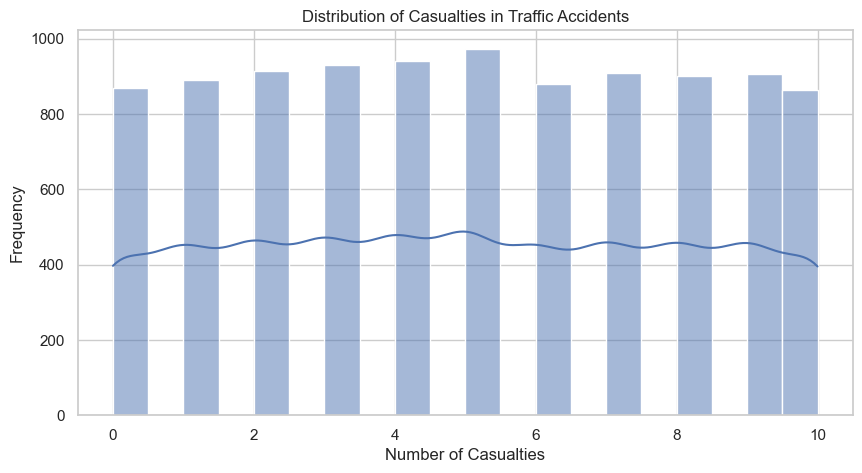

In [177]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
plt.title('Distribution of Casualties in Traffic Accidents')
sns.histplot(df['Casualties'], bins=20, kde=True)
plt.xlabel('Number of Casualties')
plt.ylabel('Frequency')
plt.savefig('casualties_hist.png')
plt.show()

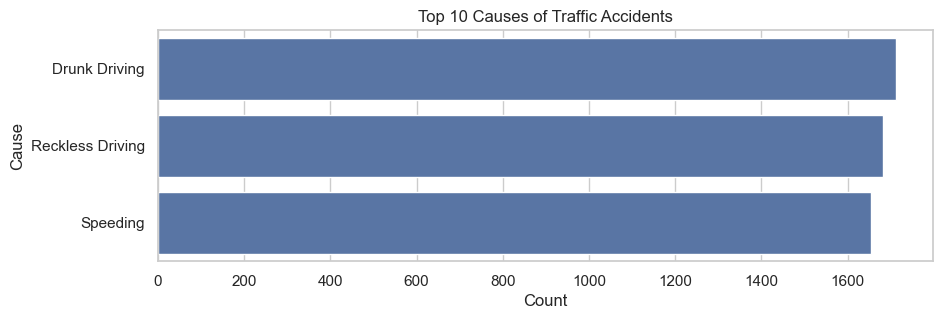

In [178]:
plt.figure(figsize=(10, 3))
sns.countplot(y='Cause', data=df, order=df['Cause'].value_counts().index[:3])
plt.title('Top 10 Causes of Traffic Accidents')
plt.xlabel('Count')
plt.ylabel('Cause')
plt.savefig('count_hist.png')
plt.show()

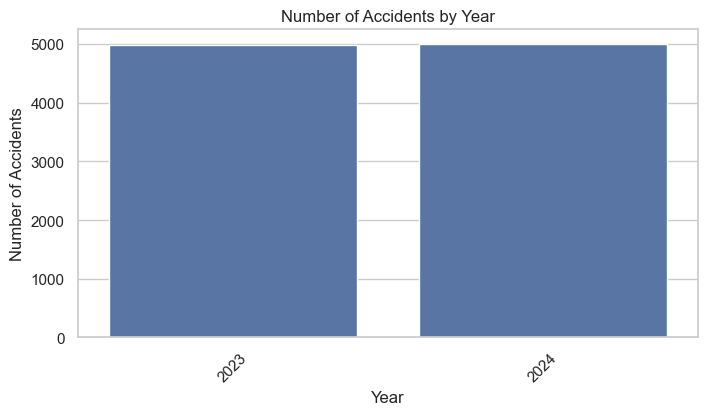

In [179]:
df['Year'] = df['Date'].dt.year
plt.figure(figsize=(8, 4))
sns.countplot(x='Year', data=df)
plt.title('Number of Accidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.savefig('countplot_hist.png')
plt.show()

## Insights

### Most accidents have low casualties <span style='color:green'>(0-5)</span>, with a long tail of rare high-casualty events.
### Analysis of global traffic accident data identifies <span style='color:red'>Drunk Driving</span>, <span style='color:red'>Reckless Driving</span>, and <span style='color:red'>Speeding</span> as primary contributors, underscoring the need for authorities to adopt more stringent legislation and punitive measures targeting such drivers.
### Data indicates that road conditions as <span style='color:red'>Under Construction</span> contribute to traffic accidents, and I advise authorities to improve safety by <span style='color:green'>enhancing signage</span>, <span style='color:green'>implementing temporary speed reductions</span>, and <span style='color:green'>ensuring timely completion of construction projects</span>.